In [20]:
%pylab inline
import scf_utils
import matplotlib.pyplot as plt
plt.style.use('../../../MW_viz/matplotlib.mplstyle')

Populating the interactive namespace from numpy and matplotlib


In [3]:
coeff_filename = "../../data/expansion/MWLMC5_snap_1e8/BFE_MWLMC5_grav_MO5_ss_COM_n20_20_nsamp_1e8_host_snap_"


In [4]:
coeff, exp_order, exp_params, rcom = scf_utils.read_coefficients(coeff_filename+"070")

In [5]:
print(np.shape(coeff))
Snlm = coeff[0]
Tnlm = coeff[1]
varSnlm = coeff[2]
varTnlm = coeff[3]
varSTnlm = coeff[4]
pmass = exp_params[1]
rs = exp_params[0]

(5, 21, 21, 21)


In [6]:
# Smoothed coefficients.

In [7]:
vis = scf_utils.SCFvis(Snlm, Tnlm, exp_order[0], exp_order[1], exp_order[2])

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:302: RuntimeWarning: divide by zero encountered in log10
  im1 = ax[0].imshow(np.log10(np.abs(self.Snlm[:,:,m])).T, origin='lower', cmap='viridis')
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:303: RuntimeWarning: divide by zero encountered in log10
  im2 = ax[1].imshow(np.log10(np.abs(self.Tnlm[:,:,m])).T, origin='lower', cmap='viridis')


0

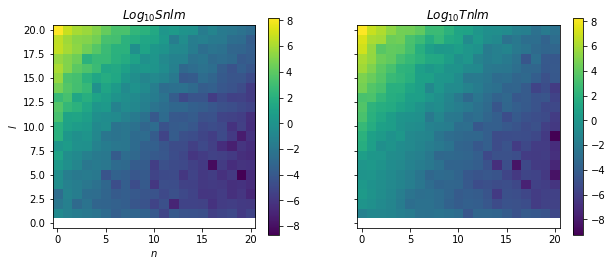

In [8]:
vis.hist_scf(m=1, axis=1)

ValueError: operands could not be broadcast together with shapes (21,21) (20,20) 

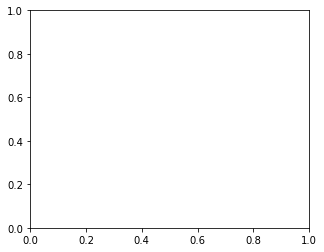

In [9]:
vis.hist_energy(m=0)

In [10]:
Snlm_smooth, Tnlm_smooth, N_coeff = scf_utils.smooth_coefficients_matrix(Snlm, Tnlm, varSnlm, varTnlm, 
                                                                         varSTnlm, pmass, verb=False, sn_threshold=5, SN=False)

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:140: RuntimeWarning: invalid value encountered in double_scalars
  bTnlm = 1 / (1 + (varTnlm/Tnlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:139: RuntimeWarning: invalid value encountered in double_scalars
  bSnlm = 1 / (1 + (varSnlm/Snlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:181: RuntimeWarning: invalid value encountered in double_scalars
  SN_coeff_unc = (S_unc**2/varS)**0.5


In [11]:
exp_order

[array(20), array(20), array(20)]

In [12]:
vis_smooth = scf_utils.SCFvis(Snlm_smooth, Tnlm_smooth, exp_order[0]+1, exp_order[1]+1, exp_order[2]+1)

0

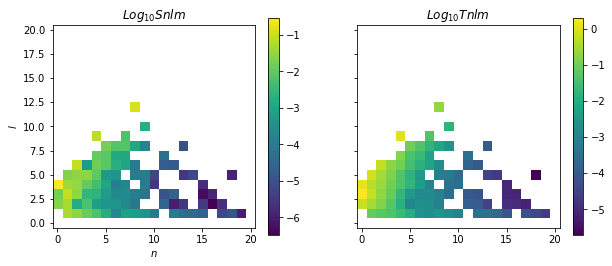

In [13]:
vis_smooth.hist_scf(m=1, axis=1)

/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:289: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(np.abs(A/A_nl)).T, origin='lower', cmap='viridis')


0

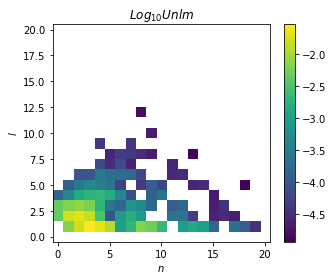

In [14]:
vis_smooth.hist_energy(m=1)

/tmp/ipykernel_215230/437668097.py:1: RuntimeWarning: divide by zero encountered in log10
  imshow(np.log10(Snlm_smooth[:,:,0]**2 + Tnlm_smooth[:,:,0]**2).T, origin='lower')


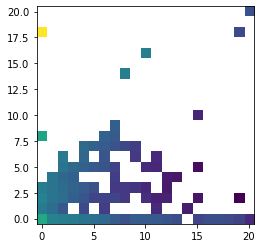

In [15]:
imshow(np.log10(Snlm_smooth[:,:,0]**2 + Tnlm_smooth[:,:,0]**2).T, origin='lower')

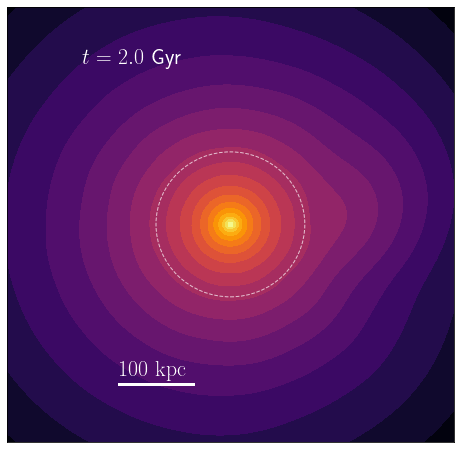

In [21]:
vis_smooth.density_contour(Snlm_smooth, Tnlm_smooth, [-300, 300], pmass, rs, 100 )

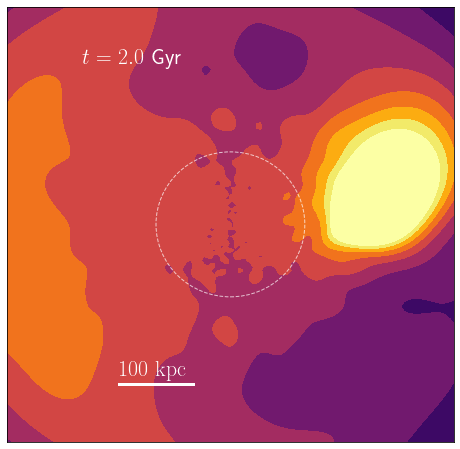

In [22]:
vis_smooth.density_contour(Snlm, Tnlm, [-300, 300], pmass, rs, 100, delta_rho=True)

In [17]:
# Time_dependent coefficients 

In [44]:
path_to_coeff = "../../data/expansion/MWLMC5_snap_1e7/"

In [46]:
coeff, exp_length, exp_params, rj = scf_utils.array_coefficients(path_to_coeff+"BFE_MWLMC5_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_", 0, 400)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../../data/expansion/MWLMC5_snap_1e7/BFE_MWLMC5_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_000.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [26]:
np.shape(coeff)

(5, 400, 21, 21, 21)

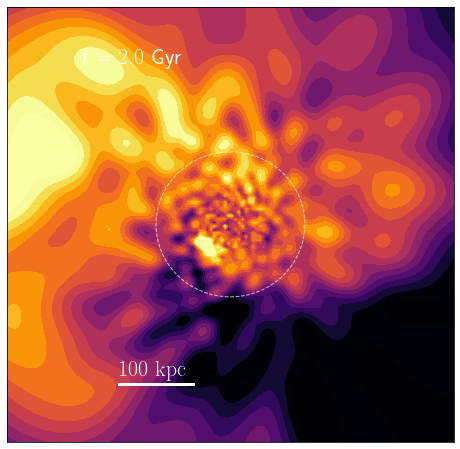

In [39]:
vis_smooth.density_contour(coeff[0][110], coeff[1][110], [-300, 300], pmass, rs, 100, delta_rho=True)

# plt.plot(Smwjnlm[:,0,0,0])

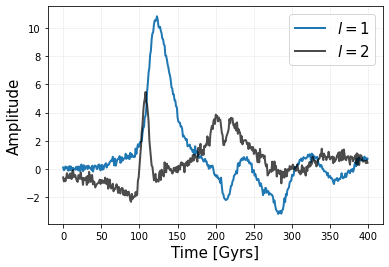

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.plot(coeff[0][:,0,1,0], lw=2, label=r'$l=1$')
plt.plot(coeff[0][:,0,2,0], c='k', alpha=0.7, lw=2, label=r'$l=2$')

plt.xlabel('Time [Gyrs]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(alpha=0.2)
plt.legend(fontsize=15)

plt.savefig('coeff_time_evolution.png', dpi=300, bbox_inches='tight')

In [82]:
# Energies 

Ujnlm = scf_utils.coefficients_energy_array(Smwjnlm, Tmwjnlm)

(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (

(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)
(21, 21) (21, 21, 21)


In [83]:
np.shape(Ujnlm)

(400, 21, 21, 21)

In [84]:
np.shape(np.sum(Ujnlm[:,0,3], axis=1))

(400,)

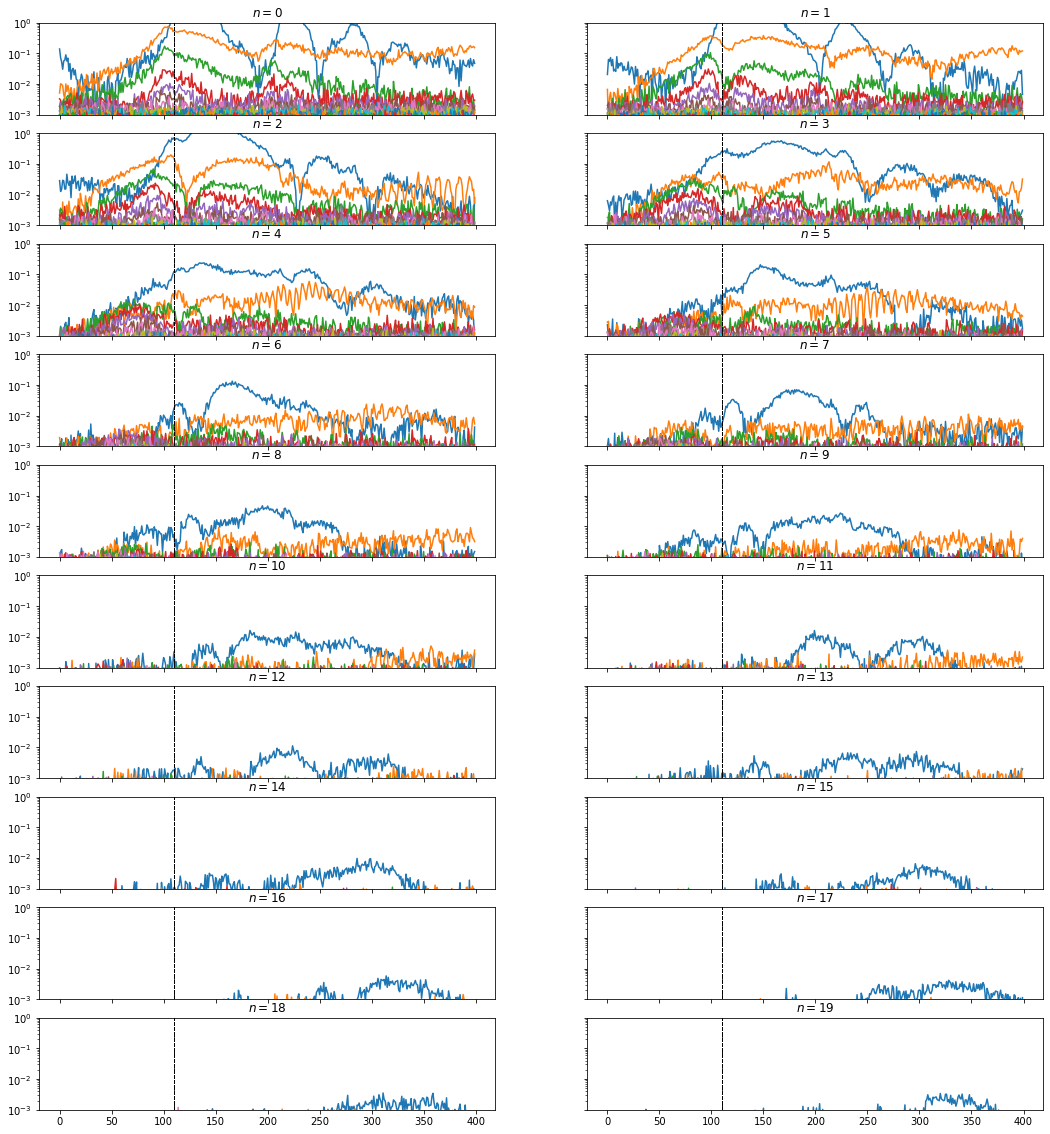

In [87]:
#plot(Ujnlm[:,0,0,0])

lmax = 20
nmax = 20

fig, ax = plt.subplots(10, 2, figsize=(18, 20), sharex=True, sharey=True)
axs = ax.flatten()
for n in range(nmax):
    for l in range(1,lmax):
        axs[n].plot((-np.sum(Ujnlm[:,n,l], axis=1)))
        axs[n].set_title('$n={:d}$'.format(n))
        axs[n].set_yscale('log')
        axs[n].set_ylim(1E-3, 1)
        axs[n].axvline(110, ls='--', alpha=0.6, lw=1, c='k')
#xlabel(r'$t$[Gyr]')
#ylabel(r'$U$')

plt.savefig('./energy_bfe_mwlmc_1e6_nmax20_lmax20.png', bbox_inches='tight')

In [32]:
scf_mw = scf_utils.SCF_coeff(path_to_coeff+"BFE_MWLMC5_grav_MO5_ss_COM_n20_20_nsamp_1e6_host_snap_", 0, 400)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../../data/expansion/MWLMC5_snap_1e8/BFE_MWLMC5_grav_MO5_ss_COM_n20_20_nsamp_1e6_host_snap_000.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [70]:
d = scf_mw.smooth_coefficients_array(sn_threshold=5, SN=True)

(400, 21, 21, 21)
(400, 21, 21, 21)
(400, 21, 21, 21)
(400,)


/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:132: RuntimeWarning: invalid value encountered in double_scalars
  bTnlm = 1 / (1 + (varTnlm/Tnlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:131: RuntimeWarning: invalid value encountered in double_scalars
  bSnlm = 1 / (1 + (varSnlm/Snlm**2))
/home/ngc/Work/research/time-dependent-BFE/scripts/scf_coefficients/scf_utils.py:173: RuntimeWarning: invalid value encountered in double_scalars
  SN_coeff_unc = (S_unc**2/varS)**0.5


In [71]:
np.shape(d[0])

(400, 21, 21, 21)

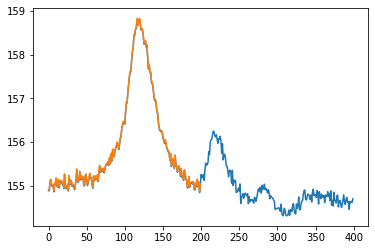

In [72]:
plt.plot(d[0][:,0,0,0])
plt.plot(Smwjnlm[:,0,0,0])

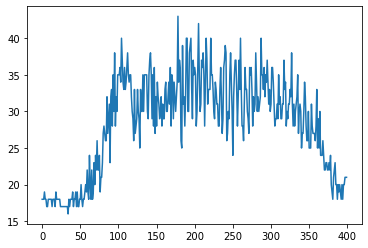

In [73]:
plot(d[2])